In [1]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.special

In [2]:
def busqueda_binaria(arreglo, elemento):
    mitad = len(arreglo) // 2
    if elemento == arreglo[mitad]:
        return mitad
    elif elemento > arreglo[mitad]:
        return mitad + busqueda_binaria(arreglo[mitad:],elemento)
    else:
        return busqueda_binaria(arreglo[:mitad],elemento)

In [3]:
def busqueda_ternaria(arreglo, elemento):
    longitud = len(arreglo)
    if longitud == 1:
        return 0
    else:
        r1 = longitud // 3
        r2 = (2*longitud) // 3
        
        if elemento < arreglo[r1]:
            return busqueda_ternaria(arreglo[:r1], elemento)
        elif elemento < arreglo[r2]:
            return r1 + busqueda_ternaria(arreglo[r1:r2], elemento)
        else:
            return r2+ busqueda_ternaria(arreglo[r2:], elemento)

In [4]:
def partition(nums, low, high):
    # We select the middle element to be the pivot. Some implementations select
    # the first element or the last element. Sometimes the median value becomes
    # the pivot, or a random one. There are many more strategies that can be
    # chosen or created.
    pivot = nums[(low + high) // 2]
    i = low - 1
    j = high + 1
    while True:
        i += 1
        while nums[i] < pivot:
            i += 1

        j -= 1
        while nums[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # If an element at i (on the left of the pivot) is larger than the
        # element at j (on right right of the pivot), then swap them
        nums[i], nums[j] = nums[j], nums[i]
        
def quick_sort(nums):
    # Create a helper function that will be called recursively
    def _quick_sort(items, low, high):
        if low < high:
            # This is the index after the pivot, where our lists are split
            split_index = partition(items, low, high)
            _quick_sort(items, low, split_index)
            _quick_sort(items, split_index + 1, high)

    _quick_sort(nums, 0, len(nums) - 1)

# Ejecuciones

In [5]:
n_min = 10
n_max = 1000
st = 10
iteraciones = 10 # iteraciones del benchmark

t_binaria = list()
t_ternaria = list()

for n in range(n_min, n_max, st):
    suma_binaria = 0
    suma_ternaria = 0
    for i in range(1, iteraciones):
        v = random.sample(range(1, 1000000), n)
        quick_sort(v)
        ind = random.randint(0,len(v)-1)
        x = v[ind]
        suma_binaria += timeit.timeit(lambda: busqueda_binaria(v, x), number = 1)
        suma_ternaria += timeit.timeit(lambda: busqueda_ternaria(v,x), number = 1)
    promedio_binaria = suma_binaria / iteraciones
    promedio_ternaria = suma_ternaria / iteraciones
    t_binaria.append(promedio_binaria)
    t_ternaria.append(promedio_ternaria)

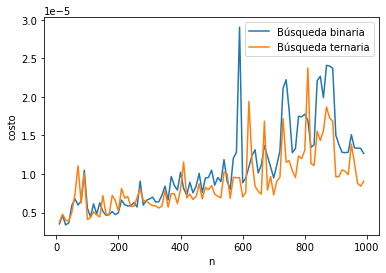

In [6]:
eje_x = list(range(n_min, n_max, st))
plt.xlabel('n')
plt.ylabel('costo')

plt.plot(eje_x, t_binaria, label = 'Búsqueda binaria')
plt.plot(eje_x, t_ternaria, label = 'Búsqueda ternaria')

plt.legend()